In [1]:
import networkx as nx
import itertools

def generate_unique_pairs(container: list[str], ignore: list[tuple[str, str]] = None) -> list[str]:
    if ignore == None:
        ignore = list()
    upairs = list()
    for (a, b) in itertools.permutations(container, 2):
        if ((b, a) not in upairs) & ((a, b) not in ignore) & ((b, a) not in ignore):
            upairs.append((a, b))
    return upairs

# ***Robustness***

In [2]:
# The ability of a network to sustain its conformation/structure when it faces failures or attacks.
# these attcks can be removal of nodes or edges
# these can be intentional manipulations or accidental mishaps.

# e.g. consider a network of airports, where the airports are nodes and the flights between them make up the edges
# sometimes airports may be shut down for some reason, this leads to the network losing a node
# sometimes a flight might get cancelled, which will result in the netwok losing an edge

In [6]:
edges = generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")]) + \
        generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")]) + \
        generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")]) + [("A", "G"), ("J", "O"), ("A", "N")]

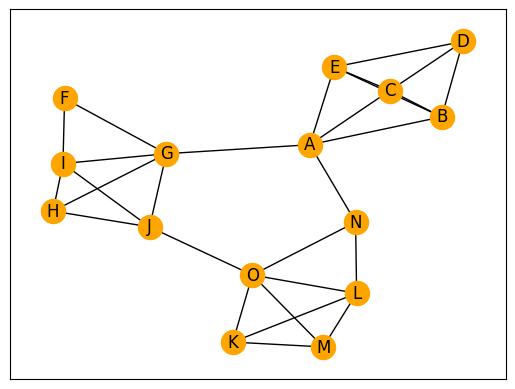

In [12]:
graph = nx.Graph()
graph.add_edges_from(edges)
pos = nx.kamada_kawai_layout(graph, scale = 10)
nx.draw_networkx(graph, node_color = "orange", pos = pos)

In [8]:
# the number of nodes needed to be removed to disconnect the graph

nx.node_connectivity(graph)

1

In [9]:
# so which node is it?

nx.minimum_node_cut(graph)

{'A'}

In [10]:
# smallest number of edges that need to be removed to disconnect the graph

nx.edge_connectivity(graph)

2

In [11]:
# A-G and A-N perhaps?

nx.minimum_edge_cut(graph)

{('G', 'A'), ('N', 'A')}

In [13]:
# in a robust network, it would take a fairly large number of nodes & edges to disconnect the graph

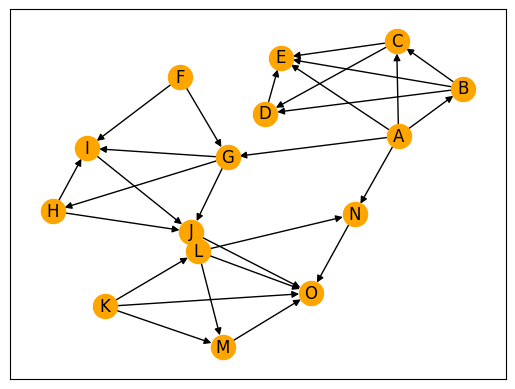

In [14]:
# let's consider a directed graph

edges = generate_unique_pairs(["A", "B", "C", "D", "E"], [("A", "D")]) + \
        generate_unique_pairs(["F", "G", "H", "I", "J"], [("H", "F"), ("J", "F")]) + \
        generate_unique_pairs(["K", "L", "M", "N", "O"], [("M", "N"), ("N", "K")]) + [("A", "G"), ("J", "O"), ("A", "N")]

graph = nx.DiGraph()
graph.add_edges_from(edges)
pos = nx.kamada_kawai_layout(graph, scale = 10)
nx.draw_networkx(graph, node_color = "orange", pos = pos)

In [28]:
# if node G is to send a message to node L, what paths are available for node G?

list(nx.all_simple_paths(graph, "A", "O"))

[['A', 'G', 'H', 'I', 'J', 'O'],
 ['A', 'G', 'H', 'J', 'O'],
 ['A', 'G', 'I', 'J', 'O'],
 ['A', 'G', 'J', 'O'],
 ['A', 'N', 'O']]

In [29]:
nx.shortest_path(graph, "A", "O")

['A', 'N', 'O']

In [30]:
# if some one wants to prevent this communication, how many nodes need to be removed? (assume they intend to do that by popping nodes)

nx.node_connectivity(graph, "A", "O")

2

In [31]:
# what is that node?

nx.minimum_node_cut(graph, "A", "O")

{'J', 'N'}

In [32]:
# now, let's say that the attacker intends to do this by popping edges, which edges need to be removed?

nx.edge_connectivity(graph, "A", "O")

2

In [33]:
# what is that edge?

nx.minimum_edge_cut(graph, "A", "O")

{('J', 'O'), ('N', 'O')}